In [1]:
%load_ext autoreload

In [2]:
import sys
import os
import json
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)
sys.path.append('/workspace/computationally-undermining-arguments/scripts/')

In [3]:
%autoreload
from data_preprocess.get_dataset import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
#clean the dataset
create_clean_cmv('/workspace/ceph_data/argument-undermining/data/cmv_20161111_dataset.json', '/workspace/ceph_data/argument-undermining/data/create_target_callout_pairs.json')

In [53]:
#split into train/validation/test per title
df = pd.read_json('/workspace/ceph_data/argument-undermining/data/cmv_20161111_dataset.json')

post_titles = list(df.title.value_counts().to_dict().keys())
training_titles, testing_titles = train_test_split(post_titles, test_size =0.2)
testing_titles, validation_titles = train_test_split(testing_titles, test_size=0.5)

training = df[df.title.isin(training_titles)]
testing  = df[df.title.isin(testing_titles)]
validation = df[df.title.isin(validation_titles)]

training.to_json('/workspace/ceph_data/argument-undermining/data/cmv_20161111_training.json')
validation.to_json('/workspace/ceph_data/argument-undermining/data/cmv_20161111_validation.json')
testing.to_json('/workspace/ceph_data/argument-undermining/data/cmv_20161111_testing.json')

In [54]:
print(len(training))
print(len(validation))
print(len(testing))

19930
2491
2494


In [24]:
create_target_callout_pairs('/workspace/ceph_data/argument-undermining/data/cmv_20161111_training.json', '/workspace/ceph_data/argument-undermining/data/vul_detection_training.json', '/workspace/ceph_data/argument-undermining/data/new_gen_training.json', 5)
create_target_callout_pairs('/workspace/ceph_data/argument-undermining/data/cmv_20161111_validation.json', '/workspace/ceph_data/argument-undermining/data/vul_detection_validation.json', '/workspace/ceph_data/argument-undermining/data/new_gen_validation.json', 5)
create_target_callout_pairs('/workspace/ceph_data/argument-undermining/data/cmv_20161111_testing.json', '/workspace/ceph_data/argument-undermining/data/vul_detection_testing.json', '/workspace/ceph_data/argument-undermining/data/new_gen_testing.json', 5)

In [26]:
df = pd.read_json('/workspace/ceph_data/argument-undermining/data/new_gen_training.json')
df.head()

,title,name,author,comment_name,comment_user,target,full_post,full_comment,premise_counter_premise_pair
0,i don't think atheist should have scientific evidence as a requirement in order to prove god.,t3_28rql5,YoungAthleticOne,t1_cidsq2m,runs_and_chews_gum,"[If so, why would the atheist think the way to finding god should be through enlightenment scientific empirical evidence when the text specifically say the path to god is through trust faith?]","[You hear it all the time: Atheist 'There is just not enough evidence for me to believe'., Well what is this evidence that you are looking for?, You want me to say one day, 'Yes, I finally found god., I found him When studying the crystal lattice structure of various elements Radon, Xenon, and Phosphorus, the individual molecules electrons are polarized such that it permeates the higgs field., Using partial derivatives to derive the Ginzburg Landau equation, we can use this model the superconductivity when the elements are freezed to absolute zero, then translating this to Soblev Spaces since the electromagnetic field creates a holomorphic form As the electron spins in a given element such as Radon in these extreme conditions, it spins unilaterally without any resistance to such that it forms hyper magnetic dipole that entangles into a higher dimensional Calabi Yau manifold permeating the Hilbert space., With this being achieved it is theorized that it must be going faster than the speed of light, and one of the theorized particles in the standard model that is capable of doing this is the Tachyon Since the element was superconductive and the individual atoms spun unilaterally to create a hyper magnetic dipole entangled into a higher dimensional manifold, then this electron in 3 dimensions is simultaneously entangled in a Calabi Yau hyper dimension manifold as a fluid interacting with Tachyons., We consider a uid described by a parameterized EoS Euclidean Supersymmetry of 8th dimension of the general form P 1 p0 HH H2H2 dHH 21 , where p0, H, H2 and dH are free parameters of the model, interacting with a Tachyonic eld with a relativistic Lagrangian assumption based on quantum superposition. ', Is that the type explanation atheist are expecting?, If so, you will never find it, because that is not how god works., Don't religious text say that the path to god, is through Trust , not Enlightenment ?, If so, why would the atheist think the way to finding god should be through enlightenment scientific empirical evidence when the text specifically say the path to god is through trust faith?]","[But you've just outlined the reasons atheists don't believe in God., Because there is no evidence, apart from the Bible, of his existence., Scientific or historical evidence supporting the existence of God would probably change the minds of most atheist on earth., Don't religious text say that the path to god, is through Trust, not Enlightenment?, There is no evidence that the path to God is trust apart from religious text, so this argument is invalid., If so, why would the atheist think the way to finding god should be through enlightenment scientific empirical evidence when the text specifically say the path to god is through trust faith?, Because atheists do not believe in the existence of a God of any sorts, I doubt any of them are actively trying to find God.]","[[If so, why would the atheist think the way to finding god should be through enlightenment scientific empirical evidence when the text specifically say the path to god is through trust faith?, Because atheists do not believe in the existence of a God of any sorts, I doubt any of them are actively trying to find God.]]"
1,i don't think atheist should have scientific evidence as a requirement in order to prove god.,t3_28rql5,YoungAthleticOne,t1_cidt2eg,[deleted],"[If so, you will never find it, because that is not how god works., If so, why would the atheist think the way to finding god should be through enlightenment scientific empirical

### Average number of sentences per premise counter:

In [20]:
import nltk
import matplotlib.pyplot as plt

In [6]:
df = pd.read_json('/workspace/ceph_data/argument-undermining/data/gen_training.json')

In [13]:
counter_premises = [counter[1] for counters in df.premise_counter_premise_pair.tolist() for counter in counters] 
counter_sents = [len(nltk.sent_tokenize(x)) for x in counter_premises]
plt.hist(counter_sents)
plt.show()

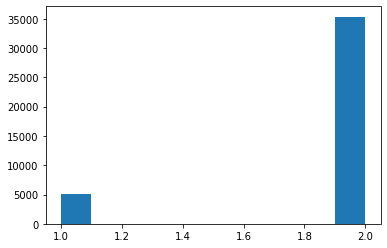

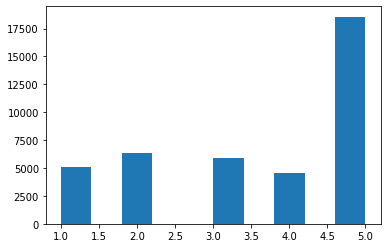

In [27]:
df = pd.read_json('/workspace/ceph_data/argument-undermining/data/new_gen_training.json')
counter_premises = [counter[1] for counters in df.premise_counter_premise_pair.tolist() for counter in counters] 
counter_sents = [len(nltk.sent_tokenize(x)) for x in counter_premises]
plt.hist(counter_sents)
plt.show()

## Jo Data:

In [4]:
def load_df_from_json(path):
    with open(path, 'r') as f:
        json_preds =[]
        for line in f:
            row = json.loads(line)
            json_preds.append(row)
    
    df = pd.DataFrame(json_preds)
    return df

In [5]:
posts_df_1 = load_df_from_json('/workspace/ceph_data/argument-undermining/jo_data/emnlp20_arg_attack/data/cmv/posts-radio.jsonlist')
posts_df_2 = load_df_from_json('/workspace/ceph_data/argument-undermining/jo_data/emnlp20_arg_attack/data/cmv/posts-nairobi.jsonlist')
posts_df = pd.concat([posts_df_1, posts_df_2])
posts_df  = posts_df.drop_duplicates(subset=['id'])
posts_df['post_id'] = posts_df['id'].apply(lambda x: 't3_'+x)

In [6]:
comments_df_1 = load_df_from_json('/workspace/ceph_data/argument-undermining/jo_data/emnlp20_arg_attack/data/cmv/comments-radio.jsonlist')
comments_df_2 = load_df_from_json('/workspace/ceph_data/argument-undermining/jo_data/emnlp20_arg_attack/data/cmv/comments-nairobi.jsonlist')
comments_df = pd.concat([comments_df_1, comments_df_2])
comments_df = comments_df.drop_duplicates(subset=['id'])
comments_df['comment_id'] = comments_df['id'].apply(lambda x: 't1_'+x)

In [7]:
post_comments_rel = pd.read_csv('/workspace/ceph_data/argument-undermining/jo_data/emnlp20_arg_attack/data/posts-qsents.csv')

In [8]:
sents_feats_df = pd.read_csv('/workspace/ceph_data/argument-undermining/jo_data/feat-combined.csv')
sents_txt_df = pd.read_csv('/workspace/ceph_data/argument-undermining/jo_data/posts-sents.csv')

#### Preparing data for detecting attackable sentences:

In [64]:
attackable_df = pd.merge(sents_txt_df[['post_id', 'sentence_no', 'sentence']], 
                 sents_feats_df[['split', 'post_id', 'sentence_no', 'direct', 'success_direct', 'all_4', 'success_all_4']], 
                 on=['post_id','sentence_no']
)

attackable_df = pd.merge(attackable_df, posts_df[['post_id', 'title']], on='post_id')

In [65]:
attackable_df_grouped = attackable_df.groupby('post_id').agg({'sentence' : lambda x: list(x),'split': lambda x: list(x)[0],
    'direct': lambda x: list(x), 'all_4': lambda x: list(x), 'title':lambda x: list(x)[0]
}).reset_index()
attackable_df_grouped['qouted_sent_idx'] = attackable_df_grouped.apply(lambda row: [ x1 or x2 for x1, x2 in zip(row['direct'], row['all_4'])], axis=1)

In [66]:
attackable_df_grouped.columns = ['post_id', 'post', 'split', 'direct', 'all_4', 'title', 'qouted_sent_idx']

In [68]:
attackable_df_grouped.to_pickle('/workspace/ceph_data/argument-undermining/jo_data/vul_data.pickle')

In [69]:
attackable_df_grouped.split.value_counts()

train    25839
val       8763
test      8558
Name: split, dtype: int64

In [33]:
attackable_df_grouped.head()

,post_id,post,split,direct,all_4,title,qouted_sent_idx
0,t3_1u4mmo,"[I believe that a church is like any other profit making business and therefore most pay similar taxes., I am not a religious person myself so I do not know the complete logistics of the revenue and spending of a church but I do understand they can yield a good amount of cash., http://www.patheos.com/blogs/friendlyatheist/2012/06/16/the-yearly-cost-of-religious-tax-exemptions-71000000000/ not entirely sure how accurate this article is, but it states that we could gain an additional 71 billion dollars per year and in a time where we as a country are in TRILLIONS of dollars of debt taxing a church seems reasonable to me., CMV]",train,"[1, 1, 0, 0]","[0, 0, 0, 0]",I believe that churches and other religious institutions should have to pay taxes. CMV,"[1, 1, 0, 0]"
1,t3_1u4mo5,"[So it seems to be common that, when caught cheating, violence is directed toward the person the significant other (SO) cheated with., I don't understand why., You were in a relationship with your SO., You had no agreement with the other party., If you are going to beat the shit out of anyone, it should be your SO., S/he is the one that cheated on you., The other party, provided they aren't a friend or acquaintance doesn't owe you anything., Why should beating the ever-loving shit out of your SO's cheat-mate be acceptable?]",train,"[1, 0, 1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",I don't believe it is acceptable to attack the person that your SO cheated on you with. CMV,"[1, 0, 1, 1, 1, 0, 0, 0]"
2,t3_1u4txm,"[(I've tried researching discussions on this topic before but I only found ones involving incredibly biased participants., Hope you guys can do better) I honestly don't understand how there is a significant number of people who believe that capitalism* can be replaced., History shows that absolutely no ruler in a socialist or communist regime is capable of upholding their ideals., If you subscribe to the notion that socialism/communism is supposed to exist without a state, then I respond that in any circumstance, whether it's survival or business, etc, people will gravitate towards leaders, whether it's in a formal or informal fashion (for instance, my workplace has a fairly ""flat"" structure but even within my group, I always seek the advice of the more experienced people)., Furthermore, even though I do agree that everyone has the right to have their MOST basic needs fulfilled (via, say, some basic income that allows people to eat, drink water and practice basic hygiene with anything else having to be worked for), I don't understand how one can transition to an economic system that no longer seeks profit., Yes, infinite growth in a finite world and all that, but without profit, we have stagnation., If you were to tell me that my income would not change for the rest of my life, I would only do the bare minimum to get by, regardless of how much I enjoyed my job., I deserve to be rewarded for my efforts., Therefore I do not understand why is it not possible to simply retool the existing system (by enforcing tax laws more harshly on large fortunes and boosting the welfare state, for instance) to allow everyone to have a living wage., Yes, some might call it implausible but I find it much less implausible than the alternative., Forgive my lack of coherence and I understand I might have some incorrect notions about this topic but that's what I am here for., I await a hopefully enlightening discussion., * Note: let's be exact here: I also think that when people online call for the end of capitalism, most of them are referring to the capitalism practiced IN THE UNITED STATES: As a European citizen, I honestly look at said system more as borderline Cyberpunk-esque anarcho capitalism more than anything else., Do you think the discussions I mentioned are mostly a result of semantic differences?, (I have heavily considered this as well)., If so, please mention it below.]",train,"[0, 0, 1, 1

In [34]:
import nltk

In [38]:
#attackable_df_grouped['post_len'] = attackable_df_grouped.post.apply(lambda x: len([token for sent in x for token in nltk.word_tokenize(sent)]))
attackable_df_grouped['post_title_len'] = attackable_df_grouped.title.apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
print('Avg post len:', np.mean(attackable_df_grouped.post_len.tolist()))

Avg post len: 367.974328081557


In [40]:
print('Avg title len:', np.mean(attackable_df_grouped.post_title_len.tolist()))

Avg title len: 18.107020389249303


#### Preparing data for generating counter claims:

In [9]:
attackable_df_grouped =  pd.read_pickle('/workspace/ceph_data/argument-undermining/jo_data/vul_data.pickle')

In [10]:
post_comments_rel['attacked'] = post_comments_rel.apply(lambda row: row['direct_n_quotes'] > 0 or row['all_4_n_quotes'] > 0 , axis=1)

In [11]:
post_comments_df = post_comments_rel[post_comments_rel['attacked']]
post_comments_df = pd.merge(post_comments_df, attackable_df_grouped[['post_id', 'title', 'post', 'split']], on='post_id')
post_comments_df = pd.merge(post_comments_df, comments_df[['comment_id', 'body']], on='comment_id')
post_comments_df = post_comments_df[['post_id', 'split', 'comment_id', 'title', 'post', 'body', 'n_sentences', 'direct_sents', 'all_4_sents']]
post_comments_df.columns= ['post_id', 'split', 'comment_id', 'title', 'post', 'comment', 'n_sentences', 'direct_sents', 'all_4_sents']

In [12]:
post_comments_df.split.value_counts()

train    67676
test     23067
val      22398
Name: split, dtype: int64

In [13]:
post_comments_df['direct_sents'] = post_comments_df['direct_sents'].apply(lambda x: x.split(',') if type(x) == str else [])
post_comments_df['all_4_sents'] = post_comments_df['all_4_sents'].apply(lambda x: x.split(',') if type(x) == str else [])
post_comments_df['title'] = post_comments_df['title'].apply(lambda x: re.sub(r'((cmv)|(CMV)):?', '', x))
post_comments_df['comment_sents'] = post_comments_df['comment'].apply(lambda x: nltk.sent_tokenize(x.lower()))

In [14]:
post_comments_df['post'] = post_comments_df['post'].apply(lambda post: [normalizeString(sent).lower() for sent in post])
post_comments_df['comment_sents'] = post_comments_df['comment_sents'].apply(lambda comment: [normalizeString(sent.replace('&gt;', '')) for sent in comment])

In [15]:
post_comments_df.split.value_counts()

train    67676
test     23067
val      22398
Name: split, dtype: int64

In [91]:
post_comments_df.to_pickle('/workspace/ceph_data/argument-undermining/jo_data/gen_data.pickle')

In [27]:
def extract_premise_counter_pairs(row, premise_max_sents=5):
    attacking_indices = []
    prev_sents = []
    premise_counter_premise_pairs = []
    post_sents = [sent for sent in row['post'] if sent.strip() != '']
    #print(post_sents)
    #print(row['direct_sents'])
    for sent in row['comment_sents']:
        sent_checks = [sent in post_sent or post_sent in sent for post_sent in post_sents]
        if any(sent_checks):
            sent_idx = sent_checks.index(True)
            #print(sent_idx)
            #print(row['post'][sent_idx])
            prev_sents.append(sent)
        elif len(prev_sents) > 0:
            premise_counter_premise_pairs.append([prev_sents, [sent]])
            prev_sents = []
        else:
            if len(premise_counter_premise_pairs) != 0:
                premise_counter_premise_pairs[-1][1].append(sent)
    
    #print(row['comment_sents'])
    #print('========')
    premise_counter_premise_pairs = [[x[0], " ".join(x[1][0:premise_max_sents])] for x in premise_counter_premise_pairs]
    #print(premise_counter_premise_pairs)
    #print('===================================')
    
    return premise_counter_premise_pairs

In [28]:
post_comments_df["premise_counter_premise_pairs"] = post_comments_df.apply(lambda x: extract_premise_counter_pairs(x) , axis=1)

In [18]:
post_comments_df["num_attacks"] = post_comments_df['premise_counter_premise_pairs'].apply(lambda x: len(x))

In [20]:
post_comments_df = post_comments_df[post_comments_df.num_attacks > 0]

In [ ]:
post_comments_df.to_pickle('/workspace/ceph_data/argument-undermining/jo_data/gen_data.pickle')

In [29]:
post_comments_df.split.value_counts()

train    53558
test     18018
val      17567
Name: split, dtype: int64

### Find if any of the posts in Hua test split appears in our training data:

In [48]:
def load_hua_data(data_path1):
    import ast
    
    with open(data_path1, 'r', encoding='utf-8') as f:
        argument=ast.literal_eval(f.read())
    
    df = pd.DataFrame(argument)
    df.set_index('name',inplace=True)
    df.columns = ['claim','post','counter pretext']
    df['claim'] = df['claim'].apply(lambda x: re.sub('(cmv)[\.-:,]?', '', x[0].lower()).replace(':', ''))
    df['claim'] = df['claim'].apply(lambda x: x + "." if x.strip()[-1] != "." else x)
    df['post_length'] = df['post'].apply(lambda x : len(x))
    
    return df

In [49]:
hua_df = load_hua_data('/workspace/ceph_data/argument-undermining/data/undermine_arguments_eval_hua.json')

In [58]:
hua_post_ids = ['t3_'+x for x in hua_df.index]
our_training_ids = post_comments_df[post_comments_df.split=='train'].post_id.tolist()

In [62]:
for test_id in hua_post_ids:
    if test_id in our_training_ids:
        print(test_id)